## Пример решения задачи регрессии

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

In [16]:
# получим столбец чисел, равномерно распределенных на интервале [0, 1) и упорядоченных по возрастанию
X = np.sort( 5 * np.random.rand(40, 1), axis = 0 )

In [17]:
X[:5]

array([[0.07861926],
       [0.12049288],
       [0.22010196],
       [0.29058414],
       [0.29227093]])

In [29]:
# зададим какую-нибудь функцию
# функция ravel() применена, чтобы преобразовать вложенный лист np.sin( X ) в простой массив
y = np.sin( X ).ravel()
y

array([ 0.0785383 ,  0.12020153,  0.21832913,  0.28651192,  0.28812759,
        0.42504879,  0.52288303,  0.73230389,  0.77332162,  0.80782872,
        0.88120059,  0.96708971,  0.99416977,  0.98982495,  0.9836486 ,
        0.97484298,  0.97373417,  0.96737928,  0.94300537,  0.92693162,
        0.88582034,  0.87199855,  0.83185434,  0.80075407,  0.6916124 ,
        0.13482509, -0.3447288 , -0.36183974, -0.36861191, -0.4909506 ,
       -0.7484192 , -0.94351166, -0.95049435, -0.99315934, -0.99621408,
       -0.99910797, -0.99998113, -0.99379508, -0.99084726, -0.97317698])

In [30]:
np.sin( X )[:5]

array([[0.0785383 ],
       [0.12020153],
       [0.21832913],
       [0.28651192],
       [0.28812759]])

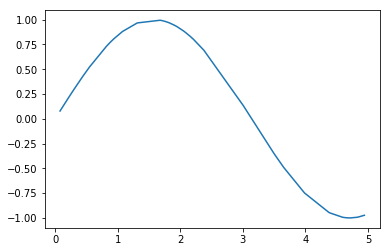

In [31]:
plt.plot( X, y )
plt.show()

In [32]:
# добавим шум к зависимой переменной
# к каждому пятому элементу добавляем случайное число
y[::5] += 1 * ( 0.5 - np.random.rand( 8 ) )

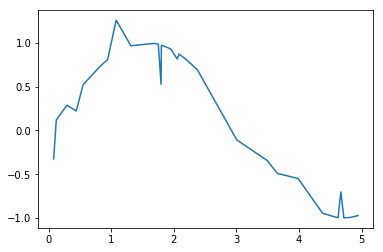

In [33]:
plt.plot( X, y )
plt.show()

In [34]:
# определим набор значений, на которых надо будет делать предсказания
T = np.linspace( 0, 5, 500 )[:, np.newaxis] # 500 точек в интервале от 0 до 5

In [35]:
T[:5]

array([[0.        ],
       [0.01002004],
       [0.02004008],
       [0.03006012],
       [0.04008016]])

In [36]:
# задаем количество соседей, которое будем учитывать в KNN
n_neighbors = 5

In [37]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'uniform' )
y_ = knn.fit( X, y ).predict( T )

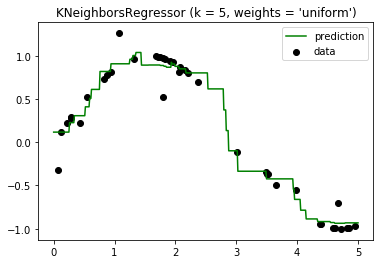

In [38]:
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'uniform'))
plt.show()

Для варианта с весами видно сильное влияние расстояния

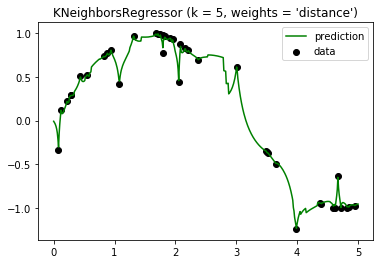

In [28]:
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'distance' )
y_ = knn.fit( X, y ).predict( T )

plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, 'distance'))
plt.show()